## Spam_detect_model

### To build a model that detects spam mails in given text



The most common ways to extract numerical features from text content, namely:
tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

1. Counting the occurrences of tokens in each document.
2. Normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

**Step 1 :** First of all we need to clean the text as there will be punctuation, stop words(refer to the most common words in a language) so we have remove all punctuation,remove all stopwords.

**Step 2 :** Create n-grams from the text. we use this by using CountVectorizer module

Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency. This was originally a term weighting scheme developed for information retrieval (as a ranking function for search engines results), that has also found good use in document classification and clustering.

**Step 3:** Normalization is implemented by the TfidfTransformer

MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). 

**Step 4:** We are using MultinomialNB for building a spam detector
**Step 5:** Verify the peformance of detector by using classification_report

## Execution

In [41]:
# Importing the packages
import os
import nltk

import seaborn as sns    
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
os.chdir(r'G:\Spam collection')


In [13]:
text = pd.read_csv('SMSSpamCollection', sep='\t', names = ['labels', 'message'])
text.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
text.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 130.6+ KB


In [5]:
text.groupby('labels').describe()


message
labels                                                          
ham    count                                                4825
       unique                                               4516
       top                                Sorry, I'll call later
       freq                                                   30
spam   count                                                 747
       unique                                                653
       top     Please call our customer service representativ...
       freq                                                    4

In [14]:
text['length'] = text['message'].apply(len)
text.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


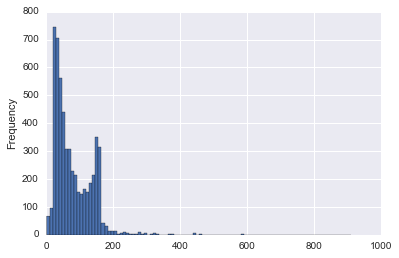

In [7]:
text['length'].plot(bins=100, kind='hist')


In [8]:
text['length'].describe()


count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [29]:
text[text['length'] ==155]['message'].iloc[0]


"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A9A9160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B395CC0>], dtype=object)

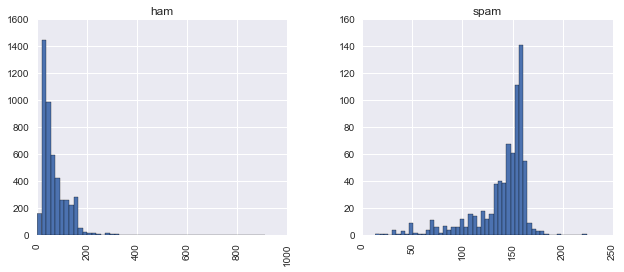

In [10]:
text.hist(column='length', by='labels', bins=50, figsize=(10,4))


In [11]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [30]:
text.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
text['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

We are using CountVectorizer from Feature_Extraction module which implements both tokenization and occurrence counting in a single class

In [31]:
bow_transformer = CountVectorizer(analyzer = text_process)

bow_transformer.fit(text['message'])

C:\Users\NOW R NEVER\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


CountVectorizer(analyzer=<function text_process at 0x000000000B26EBA8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

In [35]:
test=text['message'][3]
print(test)

U dun say so early hor... U c already then say...


In [36]:
sample = bow_transformer.transform([test])


In [37]:
print (sample)
print (sample.shape)


  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [38]:
sample_text = bow_transformer.transform(messages['message'])
print ('Shape of Sparse Matrix: ', sample_text.shape)
print ('Amount of Non-Zero occurences: ', sample_text.nnz)
print ('sparsity: %.2f%%' % (100.0 * sample_text.nnz / (sample_text.shape[0] * sample_text.shape[1])))


('Shape of Sparse Matrix: ', (5572, 11425))
('Amount of Non-Zero occurences: ', 50548)
sparsity: 0.08%


C:\Users\NOW R NEVER\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [39]:
tfidf_transformer = TfidfTransformer().fit(sample_text)
tfidf4 = tfidf_transformer.transform(sample)
print (tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334
3.28005242674
8.5270764989


In [40]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.28005242674
8.5270764989


In [42]:
text_tfidf = tfidf_transformer.transform(sample_text)
print (text_tfidf.shape)

(5572, 11425)


In [44]:
spam_detect_model = MultinomialNB().fit(text_tfidf, text['labels'])

In [45]:
print ('Predicted:', spam_detect_model.predict(tfidf4)[0])
print ('Expected:', text['labels'][3])

('Predicted:', 'ham')
('Expected:', 'ham')


In [47]:
all_predictions = spam_detect_model.predict(text_tfidf)
print (all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [48]:
from sklearn.metrics import classification_report
print (classification_report(text['labels'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [49]:
from sklearn.cross_validation import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(text['message'], text['labels'], test_size=0.2)

print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

(4457, 1115, 5572)


In [50]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [51]:
pipeline.fit(msg_train,label_train)

C:\Users\NOW R NEVER\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000B26EBA8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [52]:
predictions = pipeline.predict(msg_test)

C:\Users\NOW R NEVER\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [53]:
print (classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.98      1014
       spam       0.68      1.00      0.81       101

avg / total       0.97      0.96      0.96      1115

